Explore the global terms counts generated by Jared.
The aim is to define a suitable cut-off frequency which will decide whether a word belongs to the vocabulary or not.


In [7]:
import numpy as np
import pylab as plt
import pickle
import os,sys
import pandas as pd
from collections import Counter
import glob

%matplotlib inline  
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
pd.set_option("display.max_rows",10)

In [9]:
def filter_fmin(arr_n,arr_w,f_min):
    N = np.sum(arr_n)
    V = len(arr_n)
    arr_f = arr_n/float(N)
    
    ind_sel = np.where(arr_f>=f_min)[0]
    arr_f = arr_f[ind_sel]
    arr_n = arr_n[ind_sel]
    arr_w = arr_w[ind_sel]
    arr_f  = arr_f/np.sum(arr_f)    
    
    ind_sort = np.argsort(arr_f)[::-1]
    arr_f = arr_f[ind_sort]
    arr_n = arr_n[ind_sort]
    arr_w = arr_w[ind_sort]
    return arr_f,arr_n,arr_w

# Reading all the data

In [10]:
path_data = os.path.abspath(  os.path.join(os.pardir,'data','global_term_counts')  )
print(path_data)

/DRIVE/REPOS/wos-text-dynamics/data/global_term_counts


In [11]:
ymin = 1991
ymax = 2000
years = np.arange(ymin,ymax+1,1)
print(years)

[1991 1992 1993 1994 1995 1996 1997 1998 1999 2000]


In [12]:
list_words = []
list_counts = []

for year in years:
    fname_read = 'global_term_counts_%s.csv'%(str(year))
    with open(os.path.join(path_data,fname_read)) as f:
        x = f.readlines()
    words = np.array([h.split(',')[0] for h in x])
    counts = np.array([int(h.split(',')[1]) for h in x])
    list_words += [words]
    list_counts += [counts]
    
    
# df_tmp = pd.DataFrame(columns = years)
# df_tmp

# Zipf's law of all the distributions

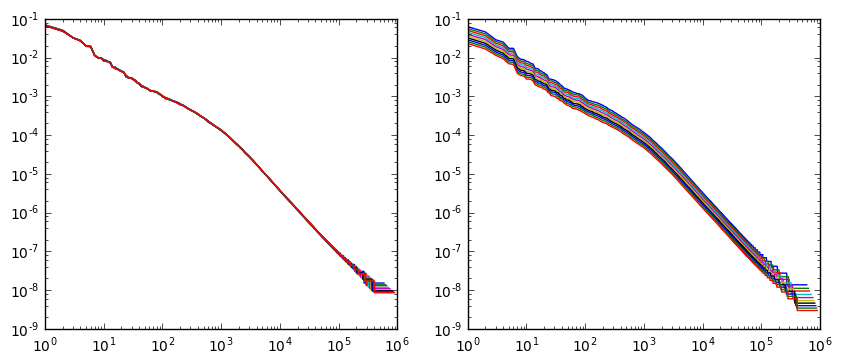

In [13]:
plt.figure(figsize=(10,4))

for i_y,y in enumerate(years):
    arr_n = list_counts[i_y]
    N = np.sum(arr_n)
    V = len(arr_n)
    arr_f = arr_n/float(N)
    ind_sort = np.argsort(arr_f)[::-1]
    arr_f = arr_f[ind_sort]
    arr_r = np.arange(V)+1
    
    plt.subplot(121)
    plt.loglog(arr_r,arr_f)
    plt.subplot(122)
    plt.loglog(arr_r,0.9**(1+i_y)*arr_f)
plt.show()

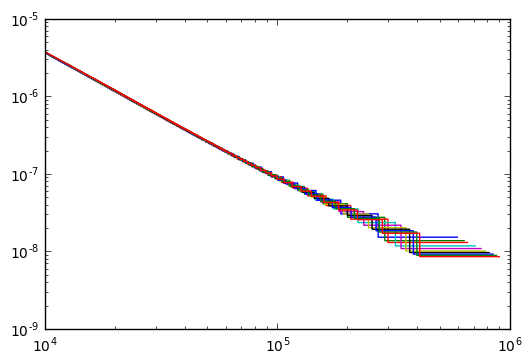

In [14]:
list_V = []
list_N = []

for i_y,y in enumerate(years):
    arr_n = list_counts[i_y]
    N = np.sum(arr_n)
    V = len(arr_n)
    arr_f = arr_n/float(N)
    ind_sort = np.argsort(arr_f)[::-1]
    arr_f = arr_f[ind_sort]
    arr_r = np.arange(V)+1
    plt.loglog(arr_r,arr_f)
    
    list_V += [V]
    list_N += [N]
plt.xlim(10**4)
plt.ylim(10**(-9),10**(-5))
plt.show()

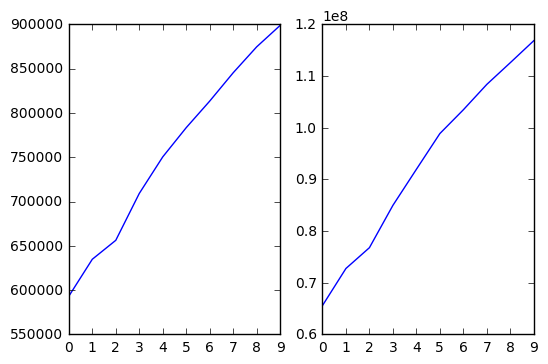

In [15]:
## number of types and tokens
plt.subplot(121)
plt.plot(list_V)
# plt.yscale('log')

plt.subplot(122)
plt.plot(list_N)
# plt.yscale('log')
plt.show()


# Zipf's law and the frequency cutoff

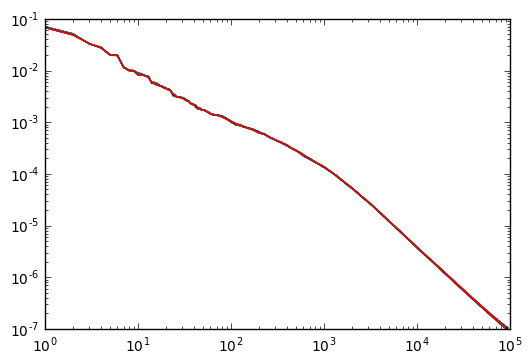

In [16]:
f_min = 10.0**(-7)
list_V_f_min = []
list_N_f_min = []

for i_y,y in enumerate(years):
    arr_n = list_counts[i_y]
    N = np.sum(arr_n)
    V = len(arr_n)
    arr_f = arr_n/float(N)
    
    ind_sel = np.where(arr_f>=f_min)[0]
    arr_f = arr_f[ind_sel]
    arr_n = arr_n[ind_sel]
    arr_f  = arr_f/np.sum(arr_f)    
    
    ind_sort = np.argsort(arr_f)[::-1]
    arr_f = arr_f[ind_sort]
    arr_n = arr_n[ind_sort]
    
    V = len(arr_f)
    N = np.sum(arr_n)
    
    list_V_f_min += [V]
    list_N_f_min += [N]
    arr_r = np.arange(V)+1
    
    plt.loglog(arr_r,arr_f)

plt.show()

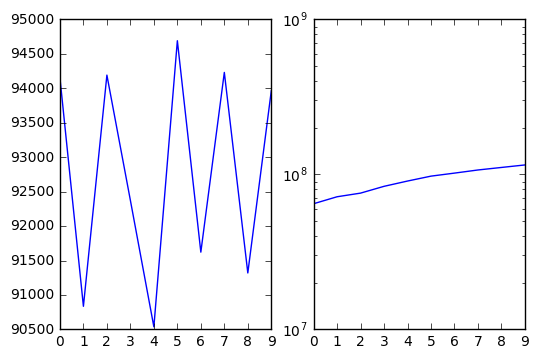

In [17]:
plt.subplot(121)
plt.plot(list_V_f_min)
plt.subplot(122)
plt.plot(list_N_f_min)
plt.yscale('log')
plt.show()

In each year there is approximately the same number of words passing a global frequency threshold.

This has implications for the measurement of the vocabulary richness.

- fields that are overrepresented (more tokens) will have more words that make the cutoff
- 

# Justify the Frequency cutoff

i.e. that there is no bias for detection of words in recent times



### Idea: check for fraction of vocab in each year

This doesnt make sense because I will just divide by a constant
Maybe just trivial

### Idea: How many new words per year

even though the number of types is the same, the larger over all sample leads to smaller fluctuations and thus to a more stable vocab?

In [18]:
f_min = 10.0**(-5)
set_vocab = set([ ])

list_p_new = []
list_p_lost = []

for i_y,y in enumerate(years[:-1]):
    arr_n1 = list_counts[i_y]
    arr_w1 = list_words[i_y]
    arr_f1,arr_n1,arr_w1 = filter_fmin(arr_n1,arr_w1,f_min)
    
    arr_n2 = list_counts[i_y+1]
    arr_w2 = list_words[i_y+1]
    arr_f2,arr_n2,arr_w2 = filter_fmin(arr_n2,arr_w2,f_min)
    
    V1 = len(arr_n1)
    V2 = len(arr_n2)
    
    V12 = len(set(list(arr_w1)).intersection(set(list(arr_w2))))
    V1_2 = len(set(list(arr_w1)).difference(set(list(arr_w2))))
    V2_1 = len(set(list(arr_w2)).difference(set(list(arr_w1))))
    
    p_new = V2_1#/float(V2)
    p_lost = V1_2#/float(V1)
    list_p_new += [p_new]
    list_p_lost += [p_lost]
    
    


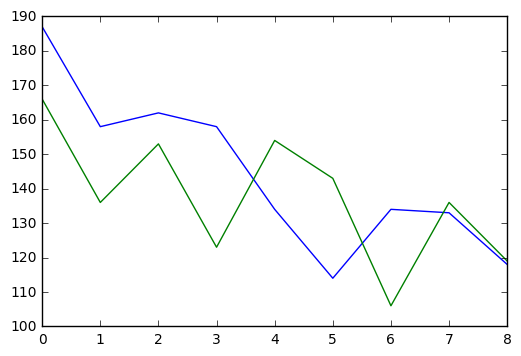

In [19]:
plt.plot(list_p_new)
plt.plot(list_p_lost)
plt.show()

In [20]:
## decrease in introduction o new words due to 

# Doing it properly with a pandas dataframe

### Original idea

follow timeseries whether a word passed the threshold at any point in time

I should create a pandas table to look at the timeseries right?

In [49]:
ymin = 1991
ymax = 2015
years = np.arange(ymin,ymax+1,1)
print(years)

[1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]


In [50]:
## first I get the complete vocab to define an index
set_vocab = set([])
for i_y,y in enumerate(years):
    fname_read = 'global_term_counts_%s.csv'%(str(y))
    with open(os.path.join(path_data,fname_read)) as f:
        x = f.readlines()
    arr_w = np.array([h.split(',')[0] for h in x])
    set_vocab.update(set(list(arr_w)))
list_vocab = list(set_vocab)
list_vocab.sort()   

In [51]:
## then I define a dataframe 
## with words as the index
## and years as the columns
df_n = pd.DataFrame(columns=years,index=list_vocab)
df_n

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aaa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aaaa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aaaaa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzzwtype,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zzzz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zzzzd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zzzzz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
for i_y,y in enumerate(years):
    fname_read = 'global_term_counts_%s.csv'%(str(y))
    with open(os.path.join(path_data,fname_read)) as f:
        x = f.readlines()
    arr_w = np.array([h.split(',')[0] for h in x])    
    arr_n = np.array([int(h.split(',')[1]) for h in x])
    df_n.loc[arr_w,y] = arr_n
    

In [53]:
fname_read

'global_term_counts_2015.csv'

In [54]:
df_n

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
a,1275689,1421793,1500341,1664988,1781593,1920376,2001493,2088255,2163863,2237813,...,2998899,3158208,3396916,3587812,3749344,4021973,4281669,4558141,4708415,4438175
aa,2679,3362,3485,3968,4509,4591,4954,4970,4600,4885,...,6708,7130,7679,8347,8457,9134,9846,10587,11139,10653
aaa,122,185,252,380,429,518,616,809,876,916,...,1482,1413,1692,1730,1812,1933,2394,2334,2443,2183
aaaa,6,7,18,5,20,7,12,18,6,29,...,14,15,30,22,27,30,38,34,23,20
aaaaa,NaN,2,2,4,2,NaN,NaN,4,1,3,...,NaN,1,4,1,3,14,3,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzzwtype,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2,2,2,3,2,NaN,NaN,1,NaN
zzzz,1,9,10,1,9,8,1,7,6,NaN,...,1,NaN,2,NaN,1,2,2,11,1,7
zzzzd,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zzzzz,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN


In [55]:
df_n.sum(axis=0)

1991     65583404.0
1992     72767070.0
1993     76790074.0
1994     84982853.0
1995     91960726.0
           ...     
2011    221109156.0
2012    235899387.0
2013    252214971.0
2014    261686802.0
2015    247429258.0
dtype: float64

In [56]:
## create a dataframe of frequencies

df_f = df_n.loc[:,:].div(df_n.sum(axis=0))

In [57]:
df_f

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
a,0.0194514,0.019539,0.0195382,0.019592,0.0193734,0.0194212,0.0193413,0.019264,0.0192168,0.0191494,...,0.0188649,0.0186138,0.0184358,0.0183555,0.0182886,0.01819,0.0181504,0.0180724,0.0179926,0.0179371
aa,4.08487e-05,4.62022e-05,4.53835e-05,4.66918e-05,4.90318e-05,4.64297e-05,4.78728e-05,4.58478e-05,4.08515e-05,4.18019e-05,...,4.21975e-05,4.20228e-05,4.16756e-05,4.27038e-05,4.12516e-05,4.13099e-05,4.17381e-05,4.19761e-05,4.25662e-05,4.30547e-05
aaa,1.86023e-06,2.54236e-06,3.28167e-06,4.47149e-06,4.66503e-06,5.23864e-06,5.95269e-06,7.46296e-06,7.77955e-06,7.83839e-06,...,9.32269e-06,8.32794e-06,9.18284e-06,8.85079e-06,8.83858e-06,8.74229e-06,1.01484e-05,9.25401e-06,9.33559e-06,8.82272e-06
aaaa,9.14866e-08,9.61974e-08,2.34405e-07,5.88354e-08,2.17484e-07,7.07925e-08,1.15962e-07,1.66048e-07,5.32846e-08,2.48159e-07,...,8.80686e-08,8.8407e-08,1.62816e-07,1.12553e-07,1.31701e-07,1.3568e-07,1.61086e-07,1.34806e-07,8.78913e-08,8.08312e-08
aaaaa,NaN,2.7485e-08,2.6045e-08,4.70683e-08,2.17484e-08,NaN,NaN,3.68997e-08,8.88077e-09,2.56716e-08,...,NaN,5.8938e-09,2.17088e-08,5.11606e-09,1.46334e-08,6.33171e-08,1.27173e-08,1.98244e-08,3.82136e-09,8.08312e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzzwtype,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.17876e-08,1.08544e-08,1.02321e-08,1.46334e-08,9.04531e-09,NaN,NaN,3.82136e-09,NaN
zzzz,1.52478e-08,1.23682e-07,1.30225e-07,1.17671e-08,9.78679e-08,8.09057e-08,9.66346e-09,6.45744e-08,5.32846e-08,NaN,...,6.29062e-09,NaN,1.08544e-08,NaN,4.8778e-09,9.04531e-09,8.47819e-09,4.36136e-08,3.82136e-09,2.82909e-08
zzzzd,NaN,NaN,NaN,NaN,NaN,2.02264e-08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zzzzz,NaN,NaN,NaN,1.17671e-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.96487e-09,NaN,NaN


### possibilities
- cut each year separately with frequency --> same number of types in each year
- keep all words that are above the threshold in at least $n=1,\ldots,T$ (consecutive) years
--> we might be more likely to keep some words more than others
- keep all words that occur at least $n$ times in total
 --> I think it might be worth to show that this introduces a bias towards more recent words. How would I demonstrate the bias?

### global occurrence cutoff

this will lead systematically more words in later years; however the effect is very small in fact

In [58]:
sum_words = df_n.sum(axis=1)

In [59]:
n_min = 100
ind_sel = sum_words>=n_min
ind_sel

a              True
aa             True
aaa            True
aaaa           True
aaaaa         False
              ...  
zzzwtype      False
zzzz          False
zzzzd         False
zzzzz         False
zzzzzzthis    False
dtype: bool

In [60]:
df_n_cut = df_n.loc[ind_sel,:]
df_n_cut

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
a,1275689,1421793,1500341,1664988,1781593,1920376,2001493,2088255,2163863,2237813,...,2998899,3158208,3396916,3587812,3749344,4021973,4281669,4558141,4708415,4438175
aa,2679,3362,3485,3968,4509,4591,4954,4970,4600,4885,...,6708,7130,7679,8347,8457,9134,9846,10587,11139,10653
aaa,122,185,252,380,429,518,616,809,876,916,...,1482,1413,1692,1730,1812,1933,2394,2334,2443,2183
aaaa,6,7,18,5,20,7,12,18,6,29,...,14,15,30,22,27,30,38,34,23,20
aaaatpas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,5,...,34,13,18,19,11,27,31,12,27,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zyoptix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8,25,17,18,6,2,NaN,2,1,2
zyxin,1,18,1,9,3,17,21,16,37,29,...,40,20,30,51,45,64,49,77,35,44
zz,153,192,175,169,152,166,151,207,220,183,...,232,205,281,233,228,209,317,342,284,280
zzz,NaN,13,15,21,21,17,15,23,19,24,...,11,13,15,6,14,19,19,10,7,12


In [61]:
df_n_cut.count(axis=0)

1991    159177
1992    166726
1993    170653
1994    176235
1995    180728
         ...  
2011    208668
2012    208618
2013    208566
2014    208306
2015    207345
dtype: int64

In [62]:
## select different occurrence thresholds
list_nmin = np.logspace(0,5,6,base=10)
print(list_nmin)
list_list_V = []
for i_n_min,n_min in enumerate(list_nmin):
    ind_sel = df_n.sum(axis=1)>=n_min
    df_n_cut = df_n.loc[ind_sel,:]
    list_V = df_n_cut.count(axis=0)
    list_list_V += [list_V]

[  1.00000000e+00   1.00000000e+01   1.00000000e+02   1.00000000e+03
   1.00000000e+04   1.00000000e+05]


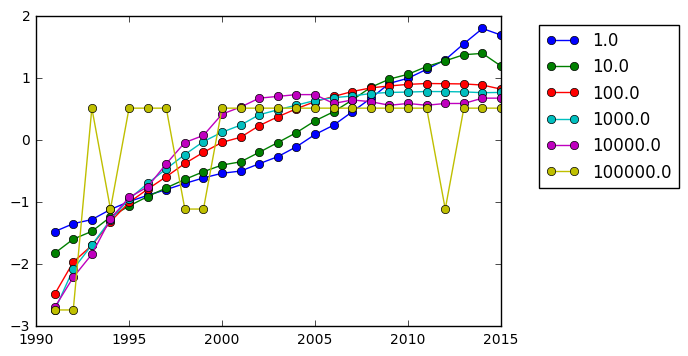

In [63]:
for i_list_V,list_V in enumerate(list_list_V):
    plt.plot(years,(np.array(list_V)-np.mean(list_V))/np.std(list_V),label = str(list_nmin[i_list_V]),marker='o')
plt.legend(loc='upper left')
plt.legend(bbox_to_anchor=(1.4, 1.0))

# plt.yscale('log')
plt.show()

## Keep all words that crossed the frequency threshold in any of the years

In [64]:
f_min = 10.0**(-7)

In [65]:
df_f

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
a,0.0194514,0.019539,0.0195382,0.019592,0.0193734,0.0194212,0.0193413,0.019264,0.0192168,0.0191494,...,0.0188649,0.0186138,0.0184358,0.0183555,0.0182886,0.01819,0.0181504,0.0180724,0.0179926,0.0179371
aa,4.08487e-05,4.62022e-05,4.53835e-05,4.66918e-05,4.90318e-05,4.64297e-05,4.78728e-05,4.58478e-05,4.08515e-05,4.18019e-05,...,4.21975e-05,4.20228e-05,4.16756e-05,4.27038e-05,4.12516e-05,4.13099e-05,4.17381e-05,4.19761e-05,4.25662e-05,4.30547e-05
aaa,1.86023e-06,2.54236e-06,3.28167e-06,4.47149e-06,4.66503e-06,5.23864e-06,5.95269e-06,7.46296e-06,7.77955e-06,7.83839e-06,...,9.32269e-06,8.32794e-06,9.18284e-06,8.85079e-06,8.83858e-06,8.74229e-06,1.01484e-05,9.25401e-06,9.33559e-06,8.82272e-06
aaaa,9.14866e-08,9.61974e-08,2.34405e-07,5.88354e-08,2.17484e-07,7.07925e-08,1.15962e-07,1.66048e-07,5.32846e-08,2.48159e-07,...,8.80686e-08,8.8407e-08,1.62816e-07,1.12553e-07,1.31701e-07,1.3568e-07,1.61086e-07,1.34806e-07,8.78913e-08,8.08312e-08
aaaaa,NaN,2.7485e-08,2.6045e-08,4.70683e-08,2.17484e-08,NaN,NaN,3.68997e-08,8.88077e-09,2.56716e-08,...,NaN,5.8938e-09,2.17088e-08,5.11606e-09,1.46334e-08,6.33171e-08,1.27173e-08,1.98244e-08,3.82136e-09,8.08312e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzzwtype,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.17876e-08,1.08544e-08,1.02321e-08,1.46334e-08,9.04531e-09,NaN,NaN,3.82136e-09,NaN
zzzz,1.52478e-08,1.23682e-07,1.30225e-07,1.17671e-08,9.78679e-08,8.09057e-08,9.66346e-09,6.45744e-08,5.32846e-08,NaN,...,6.29062e-09,NaN,1.08544e-08,NaN,4.8778e-09,9.04531e-09,8.47819e-09,4.36136e-08,3.82136e-09,2.82909e-08
zzzzd,NaN,NaN,NaN,NaN,NaN,2.02264e-08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zzzzz,NaN,NaN,NaN,1.17671e-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.96487e-09,NaN,NaN


In [66]:
ind_sel = df_f.max(axis=1)>=f_min
ind_sel

a              True
aa             True
aaa            True
aaaa           True
aaaaa         False
              ...  
zzzwtype      False
zzzz           True
zzzzd         False
zzzzz         False
zzzzzzthis    False
dtype: bool

In [67]:
df_f_cut = df_f.loc[ind_sel,:]
df_f_cut

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
a,0.0194514,0.019539,0.0195382,0.019592,0.0193734,0.0194212,0.0193413,0.019264,0.0192168,0.0191494,...,0.0188649,0.0186138,0.0184358,0.0183555,0.0182886,0.01819,0.0181504,0.0180724,0.0179926,0.0179371
aa,4.08487e-05,4.62022e-05,4.53835e-05,4.66918e-05,4.90318e-05,4.64297e-05,4.78728e-05,4.58478e-05,4.08515e-05,4.18019e-05,...,4.21975e-05,4.20228e-05,4.16756e-05,4.27038e-05,4.12516e-05,4.13099e-05,4.17381e-05,4.19761e-05,4.25662e-05,4.30547e-05
aaa,1.86023e-06,2.54236e-06,3.28167e-06,4.47149e-06,4.66503e-06,5.23864e-06,5.95269e-06,7.46296e-06,7.77955e-06,7.83839e-06,...,9.32269e-06,8.32794e-06,9.18284e-06,8.85079e-06,8.83858e-06,8.74229e-06,1.01484e-05,9.25401e-06,9.33559e-06,8.82272e-06
aaaa,9.14866e-08,9.61974e-08,2.34405e-07,5.88354e-08,2.17484e-07,7.07925e-08,1.15962e-07,1.66048e-07,5.32846e-08,2.48159e-07,...,8.80686e-08,8.8407e-08,1.62816e-07,1.12553e-07,1.31701e-07,1.3568e-07,1.61086e-07,1.34806e-07,8.78913e-08,8.08312e-08
aaaatpas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.22492e-09,8.88077e-09,4.27859e-08,...,2.13881e-07,7.66194e-08,9.76898e-08,9.72052e-08,5.36558e-08,1.22112e-07,1.31412e-07,4.75785e-08,1.03177e-07,8.89143e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzdhd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.09285e-08,NaN,NaN,NaN,NaN,2.29282e-08,1.37413e-07
zzf,4.57433e-08,1.37425e-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.29062e-09,NaN,5.42721e-09,1.02321e-07,NaN,NaN,NaN,NaN,NaN,NaN
zzz,NaN,1.78652e-07,1.95338e-07,2.47109e-07,2.28358e-07,1.71925e-07,1.44952e-07,2.12173e-07,1.68735e-07,2.05373e-07,...,6.91968e-08,7.66194e-08,8.14082e-08,3.06964e-08,6.82892e-08,8.59304e-08,8.05428e-08,3.96487e-08,2.67495e-08,4.84987e-08
zzzw,NaN,1.37425e-08,1.30225e-08,1.17671e-08,2.17484e-08,2.02264e-08,2.89904e-08,3.68997e-08,2.66423e-08,3.42288e-08,...,4.40343e-08,7.07256e-08,1.13971e-07,7.16249e-08,3.90224e-08,8.14078e-08,4.2391e-08,4.75785e-08,6.87845e-08,2.82909e-08


In [68]:
df_f_cut.count(axis=0)

1991    161318
1992    167025
1993    170463
1994    175398
1995    178499
         ...  
2011    199275
2012    199217
2013    199320
2014    198955
2015    197143
dtype: int64

In [69]:
## now lets vary the cutoff and look how many words we get for each year
list_fmin = np.logspace(-8,-2,7,base=10)
print(list_fmin)
list_list_V = []
for i_f_min,f_min in enumerate(list_fmin):
    ind_sel = df_f.max(axis=1)>=f_min
    df_f_cut = df_f.loc[ind_sel,:]
    list_V = df_f_cut.count(axis=0)
    list_list_V += [list_V]
    

[  1.00000000e-08   1.00000000e-07   1.00000000e-06   1.00000000e-05
   1.00000000e-04   1.00000000e-03   1.00000000e-02]


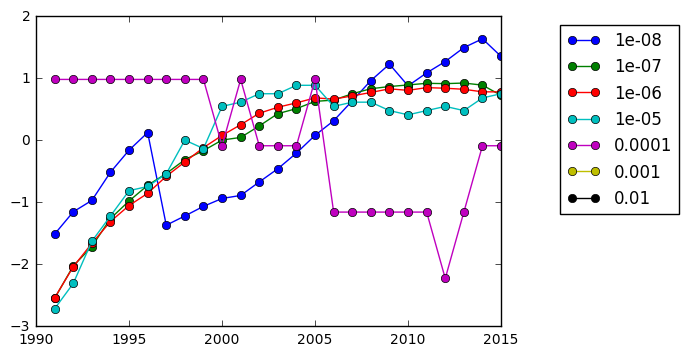

In [70]:
# for i_list_V,list_V in enumerate(list_list_V):
#     plt.plot(years,list_V,label = str(list_fmin[i_list_V]),marker='o')
# plt.legend()
# plt.yscale('log')
# plt.show()
for i_list_V,list_V in enumerate(list_list_V):
    plt.plot(years,(np.array(list_V)-np.mean(list_V))/np.std(list_V),label = str(list_fmin[i_list_V]),marker='o')
plt.legend(bbox_to_anchor=(1.4, 1.0))
# plt.yscale('log')
plt.show()

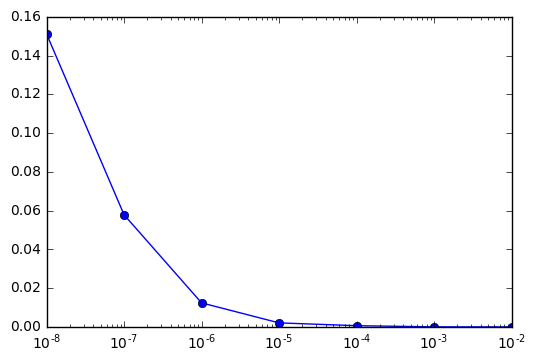

In [71]:
list_mu = []
list_std = []
for i_list_V,list_V in enumerate(list_list_V):
    list_mu += [np.mean(list_V)]
    list_std += [np.std(list_V)]
list_mu = np.array(list_mu)
list_std = np.array(list_std)
plt.plot(list_fmin,list_std/list_mu,marker='o')
plt.xscale('log')
# plt.yscale('log')
plt.show()